# 2020 Brazil`s Wildfire Analysis

I want to thank Alice Adativa for presenting this amazing dataset for us and teaching some really nice techniques about plotting maps.
Muito Obrigado Alice! Bons códigos!

If you want to check her notebook on this dataset, check the URL below:

https://www.kaggle.com/aliceadativa/an-lise-de-queimadas-no-brasil-2020

In Brazil, and in the South America as well, almost all the wildfires are man made, and they are in a wide range of reasons: cleaning huge filds for large crops, prepare of the fields, deforestation, vandalism, São João Balloons (https://i.ytimg.com/vi/1Gb8I8Xae1o/maxresdefault.jpg) and others. With more than 300.000 wildfires annualy, Brazil is on the 5th position on countries that emit more pollutants

## Brief description of the data set and a summary of its attributes

This data set was downloaded from the Brazilian National Institute of Aerospacial Research website, and the URL is provided below. 

URL: https://queimadas.dgi.inpe.br/queimadas/bdqueimadas

On the website, you can see all the wildfires that are going on in South America live, and you can also download all the data from any time period. All of the information provided, was collected by the Satelite "AQUA_M-T".

### Data Descripction

Tha data set that is going to be studied have a shape of 220094 rows and  13 columns. Each row is a different wildfire entry and is described by the following features:

*   datahora - date and time of the wildfire

*   satelite - name of the satelite that collected the information

*   pais - wildfire`s city

*   estato - wildfire`s state

*   municipio - wildfire`s city

*   bioma - biome (collection of plants and animals that have common characteristics for the environment they exist in)

*   dias sem chuva - days without raining when the wildfire was registered

*   precipitacao - milimiter of rain from all the past days until the wildfire break

*   risco fogo - predicted risk of breaking a wildfire for that specific day(0 = no chance; 1 - high chance)

*   latitude - latitude

*   longitude - longitude

*   frp - Fire Radiative Power, MW (megawatts)





## Initial plan for data exploration

First of all, we are going to take a look at the distribution of the predicted risk of breaking a wildfire on a map when the fire happened. Then we are going to see witch of the brazilian biomes are the worst ones when we are talking about the risk od breaking a wildfire.

After that, we are going to take a look at all the states and see witch one has more risk of beaking a wildfire. We are going to analyse deeply the top 2 states with the higher number of critical risk of fire and see if they fit on the biomes studies before. We are going to take a look as well at the top 1 city from each state to see if we can extrat some more info

## Actions taken for data cleaning and feature engineering

In this section, I will give a brief explanation about what was the actions taken to clean the data for a better understanding ans for better vizualization.

*   Installing missing packages, as geopandas and contextily. Both of them are for map vizualization

*   Transform the features Latitute and Longitude to CRS(Coordinate Reference Sytstem)

*   Get the riscofogo(risk of breaking out a wildfire) into categories, such as 'Cities/Rivers', 'Minimum', 'Low', 'medium', 'high', 'critical', so we can plot all the informationa and see exatly where the critical points were.

*   Transform the column "datahora" into 3 different columns, year, month, and day, so we can divide the information between years, and in the future, make possible predictioins based on the past year

*   Drop all the features that we already transformed and are not going to be used again, for example: "datahota", "latitude" and "longitude". Also drop the columns that have single values, for example: "country", and "satelite" 

*   Divide the dataset in two parts. The first have the 2020's brazilian wildfire data. The second one have the 2021's brazilian wildfire data



More detailed description are given through out the analysis below.


## Key Findings and Insights

All the Key Findings and Insights are given through out the analysis. You can read the final conclusion paragraph at the end of the analysis. 

Formulating Hypotesis about the data that we are going to analyse.



*   The majority of brazilian wildfires happen in the central area of the country where the temperatures are high and the air humidity is very low during the whole year

*   The state with less wildfires in Brazil is probably Rio Grande do Sul. I think that this is a plausable hypotesis, bacause this is the most southern state of Brazil and have the cooler temperature

*   The rain forest (Amazonia) biome is one of the most humid biome in brazil, but it is also the one with more deforestation in Brazil. My hypotesis is, even being the most humid biome, it may have one of the higher numbers of wildfires



### Next Steps in Analysing this data:

The next step in my point of view is to analyse where the bigger wildfires are breaking in Brazil, and study as well the number of wildfires per month per year and cross it with the weather stations to see if they are related some how, even knowing that the major number os wildfires in Brazil are caused by humans. 

It is possible as well to cross the wildfires with the number of population to see if it is related some way. For example: If the city have more population, does it make the wildfires number drop or rise? For that we need a dataset with all the brazilian cities and population.

It is also possible to study the ammount of wildfires in places that have almost no population, but has some huge fileds of crops. My hypotesis for this one is that the number are going to skyrocket. Maybe we could create a new feature called wildfires/citizen/m². Therefore we can study more precisely where most wildfires happen.

We could also study the time feature and see what time of the day wildfires break more often, and therefore, create some plans to control it

### Quality of this data set and a request for additional data

The quality of this data set was very good. It provided the exact place where the wildfire broke(state and city), the date and time that the fire broke and the power of the wildfire.

For this analysis be considered more complete, it needs more data. The number os citizens per city/state is a very important feature to study, knowing that most wildfires are man made. Also, we could get more data about the previous years, untill 2003( in 2003 the satelite that gathered all the data was replaced by a more accurate one, so there is a drastical change in number os wildfires between 2002 and 2003) and see how the wildfires are evolving through the years.

Another very interesting data to analyse as well, would be the government budget to fight against illegal wildfires. If the number of wildfires increased every year, and the budget as well, where all that money are going to? Brazil is a known country by its corruption, so who knows what that budget is really going?

Enjoy the analysis below.

If you have any questions about the analysis, the tought process or even about some information that is in portuguese on the website provided, you can email me on my personal email:

rafaelgherrero@gmail.com

# Google Drive link and installing Packages

In [ ]:
pip install geopandas

In [ ]:
pip install contextily

# Imports and CRS transformation for map vizualization

In [ ]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import seaborn as sns
import os
import numpy as np
import contextily
import matplotlib.pyplot as plt
import warnings
from scipy import stats 
import math

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../input/queimadas-brasil-2020/Focos_2020-01-01_2020-12-31.csv')
df.head()

##### Criando um ponto de GPS através das colunas de latitude e longitude fornecidas

Creating a CRS point through the "latitude" and "longitude" columns

In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [ ]:
wildfire_brazil = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=geometry)

In [ ]:
wildfire_brazil.head()

##### Transforming the dataset into Coordinate Reference System (CRS) of the GeoDataFrame

In [ ]:
wildfire_brazil = wildfire_brazil.to_crs(crs='EPSG:3857')

# Data manipulation

### RiscoFogo

First of all, we need to understand what this feature mean.

The feature riscofogo, is a value between 0 and 1 to forecast the chance os a wildfire break in that specific area in the same day that it happened. This numberd is calculaed through a method shown in the URL below. 
Here is the abstract of the paper in english for a brief explanation


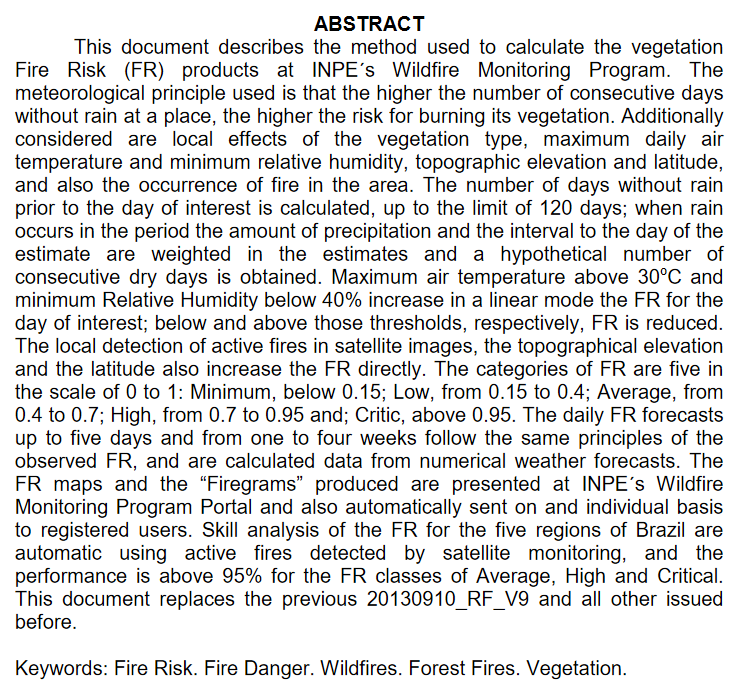

http://queimadas.cptec.inpe.br/~rqueimadas/documentos/RiscoFogo_Sucinto.pdf

If you want to understand more about the article, and you cant read in portuguese, please email me so I can answer all your questions about the paper




Now that we understood what this number represents, we need to divide the column "riscofogo"(risk of fire) into categories, such as 'Cities/Rivers', 'Minimum', 'Low', 'medium', 'high', 'critical', so we can plot all the informationa and see exatly where the critical points were. 

For that, we are going to set some ranges called below by categorias, and change the value of each row for that category.

But before we do that, we need to replace all the missing values and the values that are out of the range between 0 and 1. 

In [ ]:
wildfire_brazil.info()

In [ ]:
wildfire_brazil.shape

In [ ]:
wildfire_brazil.describe()

If we take a closer look at the "riscofogo" feature, it shows us that the minimun value is -999. 

After some research on the website privided above, I found a FAQ page, that answered what this value means. 

URL https://queimadas.dgi.inpe.br/queimadas/portal/informacoes/perguntas-frequentes

The number -999 represents an invalid value, that can be connected to some urban areas or rivers/lakes

In [ ]:
wildfire_brazil.riscofogo.describe()

In [ ]:
num = wildfire_brazil['riscofogo']._get_numeric_data()

Replacing all the values that are below 0 for -0.1

In [ ]:
num[num < 0] = -0.1

In [ ]:
wildfire_brazil.head()

In [ ]:
wildfire_brazil.info()

We still have some missing values. So lets replace it by the mean value. Usually this replace method is not the best one, but, since there are just 6200 missing values (~3%), I think that this replace is not going to change the results

In [ ]:
wildfire_brazil['riscofogo'] = wildfire_brazil['riscofogo'].replace(np.nan, 0.5)

In [ ]:
wildfire_brazil.head()

In [ ]:
semlat = wildfire_brazil.drop(columns=['latitude', 'longitude'])

In [ ]:
correlations = semlat.corr()
print(correlations)

Dividing all the values into categories and replacing it by names. We also have to replace all the negative and missing values as cities/rivers

In [ ]:
categorias = [-0.1, 0, 0.15, 0.4, 0.7, 0.95, np.inf]
 
new_riscofogo = ['cities/rivers', 'minimum', 'low', 'medium', 'high', 'critical']
wildfire_brazil["riscofogo"] = pd.cut(wildfire_brazil["riscofogo"], categorias, labels = new_riscofogo)


In [ ]:
wildfire_brazil.head()

In [ ]:
wildfire_brazil['riscofogo'].unique()

In [ ]:
wildfire_brazil['riscofogo'].value_counts()

In [ ]:
wildfire_brazil['riscofogo'] = wildfire_brazil['riscofogo'].fillna('cities/rivers')

In [ ]:
wildfire_brazil['riscofogo'].unique()

In [ ]:
wildfire_brazil['riscofogo'].value_counts()

### DataHora

Now that we have tha feature riscofogo all set, we need to replace this datahora by 3 different features, that are going to allow ur to divide the dataset into 2 (2020's brazilian wildfire and 2021's brazilians wildfire)

We are going to use the function str.split(expand=True) twice, once to create date and time, and the second time to split the date into year, month and day

In [ ]:
wildfire_brazil[['date', 'time']] = wildfire_brazil.datahora.str.split(expand=True)

In [ ]:
wildfire_brazil.head()

In [ ]:
wildfire_brazil[['year', 'month', 'day']] = wildfire_brazil.date.str.split("/",expand=True)
wildfire_brazil.head()

In [ ]:
wildfire_brazil['year'].unique()

Now we are going to drop the features that are not going to be used again.

The column datahora was already divided in 3 different features, therefore, we can drop it. Satelite and Pais(Country), can also be droped because they only have one unique value.

The feature "date" is also going to be droped bacause it is not going to give the insights that we need.

In [ ]:
wildfire_brazil = wildfire_brazil.drop(columns=[ 'datahora', 'satelite', 'pais', 'date',])

In [ ]:
wildfire_brazil_2020 = wildfire_brazil.loc[(wildfire_brazil['year']=='2020')]
wildfire_brazil_2020.head()

In [ ]:
wildfire_brazil_2020.info()

# Data Analysis

## In this analysis, we are going to look only at the wildfires that happened in 2020

From the data cleaning, we already know some information about the dataset:



*   Number of Fires registred in 2020 = 222.797
*   This means that in brazil, there were aprox 610 wildfires per day



### The map shown below represents all the wildfires in brazil in the year of 2020

In [ ]:
ax = wildfire_brazil_2020.plot(figsize=(15,10), markersize=1, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()

plt.title('Wildfires in Brazil - 2020')
plt.show()

## Risco de Fogo

We divides tha riscofogo in 6 differents categorys between 0 and 1

'Cities/Rivers', 'Minimum', 'Low', 'medium', 'high', 'critical'

1.   Cities/Rivers = 0;
2.   Minimum, below 0,15
3.   Low, between 0,15 and 0,4;
4.   Medium, between 0,4 and 0,7;
5.   High, between 0,7 and 0,95;
6.   critical, above 0.95


In [ ]:
wildfire_brazil_2020['riscofogo'].value_counts()

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="riscofogo", data=wildfire_brazil_2020, order = wildfire_brazil_2020['riscofogo'].value_counts().index)
ax.set_xlabel('RiscoFogo')
ax.set_ylabel('Number of Wildfires')
plt.title('Number of Wildfires divided by risk category')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Most of the wildfires that happen in brazil, have a critical prediction (52%). That means that we had the information that the wildfire was going to happen in that regions

In [ ]:
ax = wildfire_brazil_2020.plot(figsize=(15, 10), column='riscofogo', markersize=1, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()

plt.title('Risk of fire distributed by the Brazilian territory')
plt.show()

As we predicted before in our hypotesis, the central area of brazil is the region that has the most number of critical risk of fire

Hypotesis 1 - The majority of brazilian wildfires happen in the central area of the country where the temperatures are high and the air humidity is very low during the whole year

##Brazilian Biomes

Now that we know where all the critical regions are, lets cross that information with the Brazilian Biomes, and see witch one prones to burn more

Now, we will discuss the different biomes of Brazil, and analyse wildfires in it. But what is a biome? 

It is a group of ecosystem with a common history and climate and therefore being characterized by the same animals and plants. Biome concept includes all living beings of a community but in practice biomes are defined by the vegetation general appearance. Is a unit of biological classification used to classify major geographic regions of the world

Nowadays, six different types of biomes are defined in Brazil: Amazon, Atlantic Forest, Cerrado, Caatinga, Pampa and Pantanal. Lets undertand a little bit what are the mais caractheristics of each one of them before diving to the analysis.

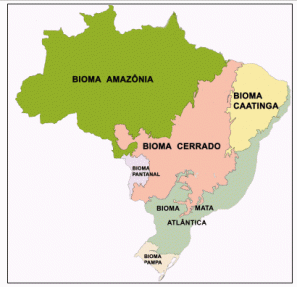

*  Amazon - The Amazon basin area is the world’s largest forest and the most biodiverse biome in Brazil. It occupies almost 50% of the country and is seriously threatened due to the deforestation caused by logging industries and soybean crops. Currently it is estimated that 16% of the amazon rainforest is under anthropic pressure.

*  Atlantic forest - Is a tropical forest covering the coastal region of Brazil and therefore it is characterized by humid winds coming from the sea and steep reliefs. It is composed of a variety of ecosystems because a high variety of altitudes, latitudes and therefore, climates ranging from semideciduous seasonal forests to open mountain fields and Araucaria’s forests in the south.


*  Cerrado - It is the second largest biome of South American covering 22% of Brazil. It is considered the richest savannah in the world in terms of species number. It contains a high level of endemic species and it is considered one of the global hotspots in terms of biodiversity. Containing 11,627 species of plants (of which 40% are endemic) and 200 animal species, 137 of which are threatened to extinction.


*  Caatinga - It is the only exclusively Brazilian biome and occupies 11% of the country. Its name comes from a native language of Brazil, the Tupi-Guarani and means white forest. However, this biome is the most undervalued and little known because of its aridity. The climate of the caatinga is semi arid and soils are stony. The vegetation is steppe and savannah like and is characterized by a great adaptation to aridity (xerophyte vegetation) often prickly. The caatinga trees lose their leaves during dry season, leaving a landscape full of whitish trunks.

*  Pampa - Pampa is a biome that occupies a single state in Brazil, Rio Grande do Sul covering only 2% of the country. Pampa biome is also very well represented in Uruguay and northern Argentina. It includes a large diversity of landscapes, ranging from plains, mountains and rocky outcrops, but the more typical are grass fields with hills and isolated trees nearby water courses.

In [ ]:
wildfire_brazil_2020['bioma'].unique()

In [ ]:
wildfire_brazil_2020['bioma'].value_counts()

Now we know that amazonia is the biome with the largest number os wildfires in Brazil, and the biome with less wildfires is Pampa, located in the south region of Brazil

This statement proves my hypotesys right. Even being a really humid biome, Amazonia still suffers a lot with wildfires that are generated by deforestation

Hypotesis - The rain forest (Amazonia) biome is one of the most humid biome in brazil, but it is also the one with more deforestation in Brazil. My hypotesis is, even being the most humid biome, it may have one of the higher numbers of wildfires


In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="bioma", data=wildfire_brazil_2020, order = wildfire_brazil_2020['bioma'].value_counts().index)
ax.set_xlabel('Biome')
ax.set_ylabel('Number of wildfires')
plt.title('Number of wildfires per Biome')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

##### Now, lets take a look at the map, and see where all of the wildfires are located. All of biomes are divides by colors. And each color represents a biome

In [ ]:
ax = wildfire_brazil_2020.plot(figsize=(15, 10), column='bioma', markersize=1, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()

plt.title('Wildfires per Biome')
plt.show()

Now that we have a top view of the problem, lets dive deeper. Now we are going to study the top 2 worst biomes, Amazonia and Cerrado

## Amazônia

From the biome study, we already know that Amazonia has 47% of all registered wildfires in 2020. But one question still stands, are those wildfires in the critical risk? Or they couldn't be predicted?

Lets take a look at the distribution od the risk of fire in this biome

In [ ]:
amazonia_2020 = wildfire_brazil_2020.query('bioma == "Amazonia"')
amazonia_2020.head()

In [ ]:
amazonia_2020.shape

In [ ]:
amazonia_2020['riscofogo'].value_counts().sort_index(ascending=True)

In [ ]:
risco_ordem = ['critical', 'high', 'medium', 'low', 'minimum', 'cities/rivers']
plt.figure(figsize=(12,5))
ax = sns.countplot(x="riscofogo", data=amazonia_2020, order=risco_ordem)
ax.set_xlabel('RiscoFogo')
ax.set_ylabel('Number of wildfires')
plt.title('Number of wildfires per category in the Amazonia biome')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

I was expecting a much higher number of critical days in Amazonia. But this number is actually a lot plausable, knowing that the most of the wildfires are human made in this Biome

Only 27% of all Brazilian critical cases belong to the Amazonia biome

In [ ]:
ax = amazonia_2020.plot(figsize=(12, 7), column='riscofogo', markersize=1, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()

plt.title('Categories of riscofogo at Amazonia')
plt.show()

In [ ]:
amazonia_2020['estado'].value_counts()

The worst state in the Amazonia biome, is Para. After we analyse the second worst biome, we will take a closer look at the worst cities as well

We can see that the majority of the wildfires are located at the southest part of the biome, making border with Cerrado, the second most afected biome.

Lets take a closer look to at Cerrado's biome

## Cerrado

Carrado is the second worst biome when we are talking about wildfires. Lets take a deeper look at this biome

In [ ]:
cerrado_2020 = wildfire_brazil_2020.query('bioma == "Cerrado"')
cerrado_2020.head()

In [ ]:
cerrado_2020.shape

In [ ]:
cerrado_2020['riscofogo'].value_counts().sort_index(ascending=True)

In [ ]:
risco_ordem = ['critical', 'high', 'medium', 'low', 'minimum', 'cities/rivers']
plt.figure(figsize=(12,5))
ax = sns.countplot(x="riscofogo", data=cerrado_2020, order=risco_ordem)
ax.set_xlabel('RiscoFogo')
ax.set_ylabel('Number of wildfires')
plt.title('Number of wildfires per category in the Cerrado biome')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

After tha analysis, we can conclude that 45% of all critical cases of risk fire in Brazil, are located in Cerrado. Witch means that this state is the one with more natural fires caused by the dry weather and elevated temperatures.

But in the other hand, it contains just 28% of all Brazilian wildfires

Now lets take a look at the map and find out witch states are included in this biome, and where in the continent is locates this biome. 

In [ ]:
ax = cerrado_2020.plot(figsize=(12, 7), column='riscofogo', markersize=1, legend=True)
contextily.add_basemap(ax)
ax.set_axis_off()

plt.title('Categories of riscofogo at Cerrado')
plt.show()

In [ ]:
cerrado_2020['estado'].value_counts()

## States Analysis

### Intro States

Number of wildfires per state in 2020

In [ ]:
wildfire_brazil_2020['estado'].value_counts()

Now we are going to analyse deeper the top 2 worst states. The chosen ones are Mato Grosso and Para. and then we will try to extract some usefull information about the worst cities in this 2 states

Mato Grosso - Worst state in Brazil 's critical category and the state that has 21% of all registers in 2020 (47.708 wildfires)

Para - Worst state in Cerrado's critical category and the state that has 44% of all critical registers in Brazil in the year of 2020 (38.603 wildfires)


## Mato Grosso 

In [ ]:
mato_grosso_state = wildfire_brazil_2020.query('estado == "MATO GROSSO"')
mato_grosso_state.head()

In [ ]:
mato_grosso_state['estado'].value_counts()

In [ ]:
mato_grosso_state['riscofogo'].value_counts()

In [ ]:
mato_grosso_state['bioma'].value_counts()

In [ ]:
mato_grosso_state_amazonia = mato_grosso_state.query('bioma == "Amazonia"')
mato_grosso_state_amazonia['riscofogo'].value_counts()

In [ ]:
mato_grosso_state_pantanal = mato_grosso_state.query('bioma == "Pantanal"')
mato_grosso_state_pantanal['riscofogo'].value_counts()

In [ ]:
mato_grosso_state_cerrado = mato_grosso_state.query('bioma == "Cerrado"')
mato_grosso_state_cerrado['riscofogo'].value_counts()

Mato Grosso, has 32.435 (75%) critical registers, and all of them are divided almost equaly between three different biomes, two of them were analysed above and proven to be the worst biomes in terms of numbers of wildfires in 2020:



*   Amazonia - 11.117 critical 
*   Pantanal - 10.516 critical 
*   Cerrado - 10.742 critical 





Now let's take a look at the map to undestand how the distribution of wildfires are in Mato Grosso:

In [ ]:
ax1 = mato_grosso_state.plot(figsize=(12, 7), column='bioma', markersize=1, legend=True)
ax2 = mato_grosso_state.plot(figsize=(12, 7), column='riscofogo', markersize=1, legend=True)
contextily.add_basemap(ax1)
contextily.add_basemap(ax2)
ax.set_axis_off()

plt.title('Categories of riscofogo at Mato Grosso State')
plt.show()

In [ ]:
#remove zero values
mask1 = mato_grosso_state['longitude'] != 0
mask2 = mato_grosso_state['latitude'] != 0

x = mato_grosso_state[mask1&mask2]['longitude']
y = mato_grosso_state[mask1&mask2]['latitude']
z = mato_grosso_state[mask1&mask2]['frp']

#use the scatter function
plt.figure(figsize=(10,10))
plt.title('Location of the wildfires in Mato Grosso')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax = plt.scatter(x, y, s=z/10, alpha=1)

plt.show

Most of the fires are well distributed arround all the state, and the intense ones are in the southern part of the state in the Pantanal biome. 

Now lets take a look at the city with the higher number of wildfires in Mato Grosso and find out in what biome it is contained

In [ ]:
mato_grosso_state['municipio'].value_counts()

### Poconé

Poconé is a small city in the state of Mato Grosso, and it is located close to the Bolivian boarder right by the Mato Grosso do Sul boarder as well. It had 5.259 registered wildfires in 2020

In [ ]:
pocone_municipio = mato_grosso_state.query('municipio == "POCONE"')
pocone_municipio.head()

In [ ]:
pocone_municipio.municipio.value_counts()

In [ ]:
pocone_municipio['bioma'].value_counts()

In [ ]:
pocone_municipio_pantanal = pocone_municipio.query('bioma == "Pantanal"')
pocone_municipio_pantanal['riscofogo'].value_counts()

Now it is possible to say that 41% of all Pantanal critical wildfires inside Mato Grosso state. And 37% of the critical wildfires in Mato Grosso happen in the city of Poconé




## Pará 

In [ ]:
ax1 = pocone_municipio.plot(figsize=(12, 8), column='riscofogo', markersize=1, legend=True)
ax2 = pocone_municipio.plot(figsize=(12, 8), column='bioma', markersize=1, legend=True)
contextily.add_basemap(ax1)
contextily.add_basemap(ax2)
ax1.set_axis_off()
ax2.set_axis_off()



plt.title('Categories of riscofogo at Poconé city')
plt.show()

In [ ]:
para_state = wildfire_brazil_2020.query('estado == "PARA"')
para_state.head()

In [ ]:
para_state['estado'].value_counts()

In [ ]:
para_state['riscofogo'].value_counts()

In [ ]:
para_state['bioma'].value_counts()

In [ ]:
para_amazonia = mato_grosso_state.query('bioma == "Amazonia"')
para_amazonia['riscofogo'].value_counts()

Pará, has 11.891 (11%) critical registers, and all of them are located at one bioime only, Amazonia.




Now let's take a look at the map to undestand how the distribution of wildfires are in Pará:

In [ ]:
ax1 = para_state.plot(figsize=(12, 7), column='bioma', markersize=1, legend=True)
ax2 = para_state.plot(figsize=(12, 7), column='riscofogo', markersize=1, legend=True)
contextily.add_basemap(ax1)
contextily.add_basemap(ax2)

plt.title('Categories of biome at Pará State')
plt.show()

In [ ]:
#remove zero values
mask1 = para_state['longitude'] != 0
mask2 = para_state['latitude'] != 0

x = para_state[mask1&mask2]['longitude']
y = para_state[mask1&mask2]['latitude']
z = para_state[mask1&mask2]['frp']

#use the scatter function
plt.figure(figsize=(10,10))
plt.title('Location of the wildfires in Pará')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax = plt.scatter(x, y, s=z/10, alpha=1)

plt.show

Most of the critical fires are located in the southern part of the state 

Now lets take a look at the city with the higher number of wildfires in Pará and find out in what biome it contains

In [ ]:
para_state['municipio'].value_counts()

### São Félix do Xingú

São Félix do Xingú is a small city in the state of Pará. It had 5.285 registered wildfires in 2020

In [ ]:
sfx_municipio = para_state.query('municipio == "SAO FELIX DO XINGU"')
sfx_municipio.head()

In [ ]:
sfx_municipio.municipio.value_counts()

In [ ]:
sfx_municipio['bioma'].value_counts()

In [ ]:
sfx_municipio_amazonia = sfx_municipio.query('bioma == "Amazonia"')
sfx_municipio_amazonia['riscofogo'].value_counts()

Now it is possible to say that 23% of all Amazonia critical wildfires inside Pará state happened in the city of São Felix do Xingú. And 21% of the critical wildfires in Mato Grosso happen in the city of Poconé






In [ ]:
ax1 = sfx_municipio.plot(figsize=(12, 8), column='riscofogo', markersize=1, legend=True)
ax2 = sfx_municipio.plot(figsize=(12, 8), column='riscofogo', markersize=1, legend=True)
contextily.add_basemap(ax1)
contextily.add_basemap(ax2)
ax1.set_axis_off()
ax2.set_axis_off()



plt.title('Categories of riscofogo at São Félix do Xingú city')
plt.show()

# Key Findings and Insights

We were able to map all of the wildfires that happened in 2020 in Brazil and come to the final conclusion:

In the year of 2020, there were 222.797 different wildfires registered in the whole national territory of Brazil. This means that we have approximately 610 wildfires per day. Inside the 222.797 fires registered, more then half (52%) are categorized as critical by the parameter RisgoFogo that predicts whether it is going to break out a fire in that especific place or not in the day that the fire happened.

After looking at the dataset as a whole, we started to analyse it from the perspective of the biomes in Brazil. 

We discovered that 47% of the whole country 's wildfires are located in Amazonia, but only 27% of critical ones, meaning that probably, most fires in that biome are man made. The worse state inside that biome is Pará, with 38.603 wildfires inside this biome.

Cerrado is another Brazilian biome that had inumerous wildfires during the year of 2020. only 28% of Brazil 's wildfire are located in this biome. 45% of all critical locations in Brazil are inside this biome. The worst state in this biome is Mato Grosso, with 10.742 critical cases

After reviewing the critical biomes, we started to analyse the worst two states in Brazil when we are talking about wildfires, Mato Grosso and Pará

Mato Grosso had 47.708 wildfires, 30% of all critical wildfires in Brazil, and inside the state, the numbers are almost divides equaly between 3 biomes, Amazonia(20.648 wildfires, 11.177 critical), Pantanal(13.207 wildfires, 10.516 critical) and Cerrado(13.853 wildfires, 10.742 critical).

The worse city in Mato Grosso is Poconé, with 5.572 cases, and located 100% inside the Pantanal biome

Pará, in other hand, had 38.603 wildfires in the year of 2020, making 36% of the whole country. Amazonia is the only biome in Pará, with 11.117 critical locations

We also looked at the worse city in Pará, São Felix do Xingú, with just 5.290 wildfires, and 2.558 critical ones inside Amazonia.

Therefore, we can assume that in the hottest places in Brazil, located at the north of the country, have more chances of breaking a wildfire. We can say that the two most sensible biomes in Brazil are Amazonia and Cerrado, the two states are Mato Grosso and Pará, and the respectice cities are Paconé and São Félix do Xingú.